# Project Introduction
#The Python Student Result Analysis project aims to analyze students’ academic performance using data-driven techniques. It reads student result data (e.g., gender, ethnic group, test scores, parental education level) and generates insights through visualizations and statistics.
This helps teachers, schools, and researchers understand patterns and factors affecting student performance.

# Features
#Data Import & Cleaning: Reads student dataset (CSV/Excel) and removes missing or inconsistent data.

Exploratory Data Analysis (EDA): Generates descriptive statistics for each column.

Data Visualization:

Bar charts for categorical data like gender or ethnic group.

Pie charts for group distribution.

Histograms and boxplots for score distributions.

Correlation Analysis: Shows relationships between variables (e.g., parental education vs. scores).

Interactive Output: Displays graphs and tables for better interpretation.


# Technologies / Libraries Used
#Python (core programming language)

Pandas – for data manipulation and analysis

NumPy – for numerical operations

Matplotlib & Seaborn – for visualization (bar plots, pie charts, histograms, count plots)

Jupyter Notebook / HTML Export – for running and sharing analysis results

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
 df = pd.read_csv("student_source.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
0           0  female     group B   bachelor's degree      standard   
1           1  female     group C        some college      standard   
2           2  female     group B     master's degree      standard   
3           3    male     group A  associate's degree  free/reduced   
4           4    male     group C        some college      standard   

    TestPrep  MathScore  ReadingScore  WritingScore  
0       none         72            72            74  
1  completed         69            90            88  
2       none         90            95            93  
3       none         47            57            44  
4       none         76            78            75  


In [14]:
df.describe()

,Unnamed: 0,MathScore,ReadingScore,WritingScore
count,30641.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,66.749355,69.624980,68.468327
std,288.747894,15.206049,14.671572,15.307814
min,0.000000,0.000000,10.000000,5.000000
25%,249.000000,56.000000,60.000000,58.000000
50%,500.000000,67.000000,70.000000,69.000000
75%,750.000000,78.000000,80.000000,79.000000
max,999.000000,100.000000,100.000000,100.000000


In [15]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    30641 non-null  int64 
 1   Gender        30641 non-null  object
 2   EthnicGroup   30641 non-null  object
 3   ParentEduc    30641 non-null  object
 4   LunchType     30641 non-null  object
 5   TestPrep      30641 non-null  object
 6   MathScore     30641 non-null  int64 
 7   ReadingScore  30641 non-null  int64 
 8   WritingScore  30641 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 2.1+ MB


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# gender distribution

In [16]:
print(df.columns)


Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'MathScore', 'ReadingScore', 'WritingScore'],
      dtype='object')


In [17]:
df.columns = df.columns.str.strip()  # removes leading/trailing spaces
df.columns = df.columns.str.lower()  # make all lowercase for consistency
print(df.columns)


Index(['unnamed: 0', 'gender', 'ethnicgroup', 'parenteduc', 'lunchtype',
       'testprep', 'mathscore', 'readingscore', 'writingscore'],
      dtype='object')


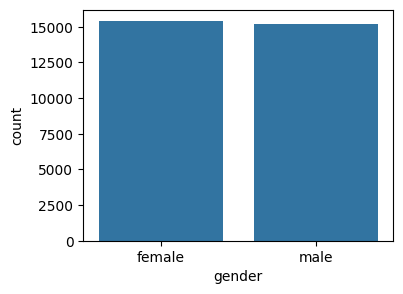

In [18]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x="gender")  # use lowercase after cleaning
plt.show()


In [19]:
print(df.head())


   unnamed: 0  gender ethnicgroup          parenteduc     lunchtype  \
0           0  female     group B   bachelor's degree      standard   
1           1  female     group C        some college      standard   
2           2  female     group B     master's degree      standard   
3           3    male     group A  associate's degree  free/reduced   
4           4    male     group C        some college      standard   

    testprep  mathscore  readingscore  writingscore  
0       none         72            72            74  
1  completed         69            90            88  
2       none         90            95            93  
3       none         47            57            44  
4       none         76            78            75  


# Gender Analysis

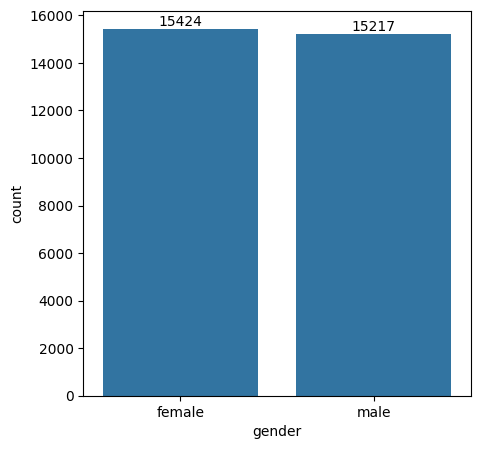

In [22]:
plt.figure(figsize = (5, 5))
ax = sns.countplot(data = df, x = "gender")
ax.bar_label(ax.containers[0])
plt.show()

#From the above chart we have analysed that:
#The number of females in the data is more than the numbers of males

In [23]:
gb = df.groupby("parenteduc").agg({"mathscore" : 'mean', "readingscore" : 'mean', "writingscore" : 'mean'})
print(gb)

                    mathscore  readingscore  writingscore
parenteduc                                               
associate's degree  68.527787     71.368350     70.374619
bachelor's degree   70.635000     73.375556     73.423611
high school         64.670038     67.522467     65.565909
master's degree     72.168137     75.202044     75.246168
some college        66.603434     69.528093     68.653661
some high school    62.926359     65.826816     63.815473


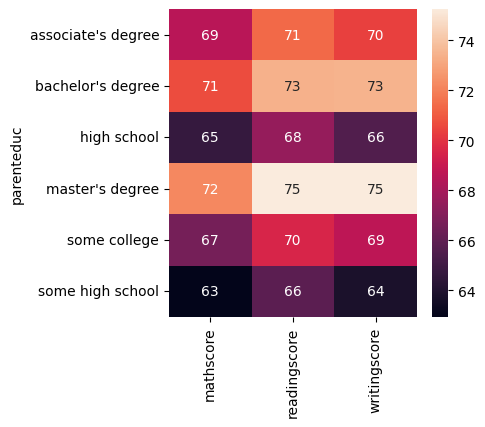

In [26]:
plt.figure(figsize = (4, 4))
sns.heatmap(gb, annot = True )
plt.show()

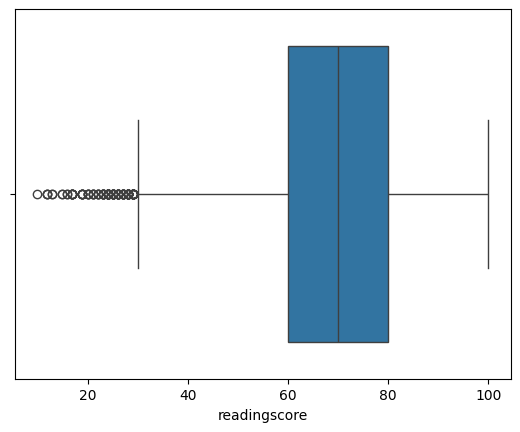

In [28]:
sns.boxplot(data = df, x = "readingscore")
plt.show()

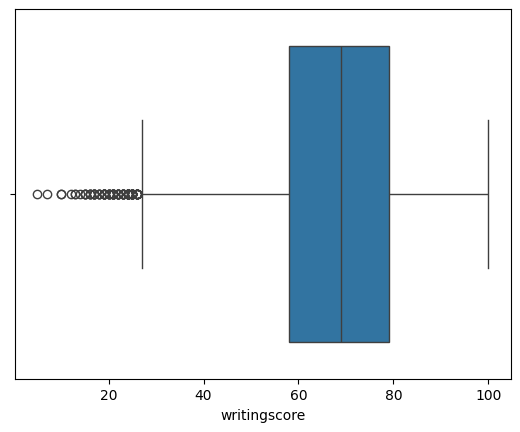

In [29]:
sns.boxplot(data = df, x = "writingscore")
plt.show()

In [31]:
print(df["ethnicgroup"].unique())

['group B' 'group C' 'group A' 'group D' 'group E']


# Distribution of Ethnic Groups

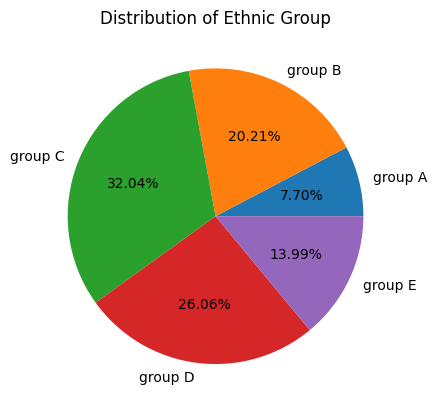

In [35]:
l = ["group A", "group B", "group C", "group D", "group E"]
mlist = [groupA["ethnicgroup"], groupB["ethnicgroup"], groupC["ethnicgroup"], groupD["ethnicgroup"], groupE["ethnicgroup"]]

plt.pie(mlist, labels=l, autopct="%.2f%%")
plt.title("Distribution of Ethnic Group")
plt.show()



[Text(0, 0, '6192'),
 Text(0, 0, '9816'),
 Text(0, 0, '2359'),
 Text(0, 0, '7986'),
 Text(0, 0, '4288')]

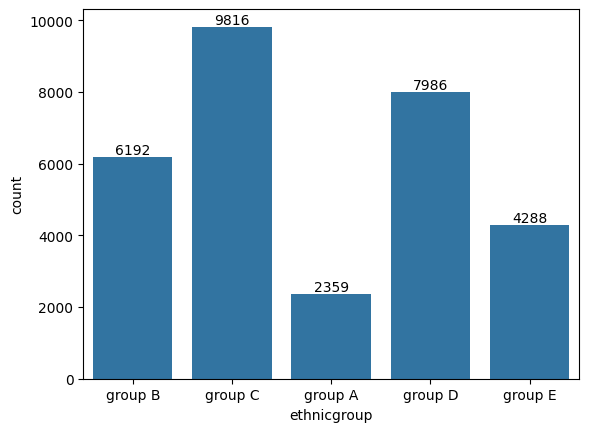

In [36]:
ax = sns.countplot(data = df, x = 'ethnicgroup')
ax.bar_label(ax.containers[0])